In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from qlearning import QLearningAgent


def play_and_train(env, agent, t_max=10**5):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        next_s, r, done, _ = env.step(a)
        agent.update(s, a, next_s, r)
        s = next_s
        total_reward +=r
        if done:
            break
        
    return total_reward

### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
env = gym.make("Taxi-v2")
n_actions = env.action_space.n

[2017-03-08 15:48:56,456] Making new env: Taxi-v2


epsilon = 0
mean reward = 7.98


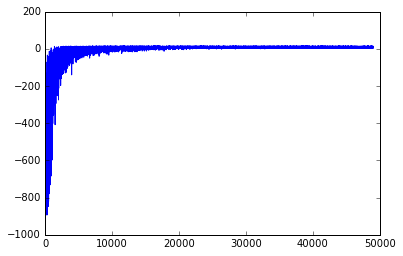

In [3]:
agent = QLearningAgent(alpha=0.5, epsilon=1, discount=0.99,
                       getLegalActions=lambda s: range(n_actions))

rewards = []
for i in range(50000):
    rewards.append(play_and_train(env, agent))
    
    if agent.epsilon < 1e-6:
        agent.epsilon = 0
    else:
        agent.epsilon *= 0.9997
        
    
    if i % 1000 == 0:
        clear_output(True)
        print("epsilon = {}" .format(agent.epsilon))
        print("mean reward = {}" .format(np.mean(rewards[-100:])))
        plt.plot(rewards)
        plt.show()

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

In [10]:
from gym.core import ObservationWrapper

class Binarizer(ObservationWrapper):
    def _observation(self, state):
        state[0] = round(state[0], 1)
        state[1] = round(state[1], 1)
        state[2] = round(state[2], 1)
        state[3] = round(state[3], 1)
        
        return tuple(state)
    
env = Binarizer(gym.make("CartPole-v0"))
n_actions = env.action_space.n

[2017-03-08 15:54:06,406] Making new env: CartPole-v0


epsilon = 0
mean reward = 197.72


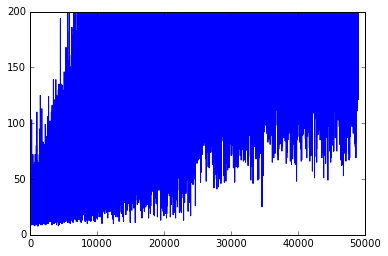

In [11]:
agent = QLearningAgent(alpha=0.7, epsilon=1, discount=0.99,
                       getLegalActions=lambda s: range(n_actions))

rewards = []
for i in range(50000):
    rewards.append(play_and_train(env, agent))
    
    if agent.epsilon < 1e-2:
        agent.epsilon = 0
    else:
        agent.epsilon *= 0.9998
        
    
    if i % 1000 == 0:
        clear_output(True)
        print("epsilon = {}" .format(agent.epsilon))
        print("mean reward = {}" .format(np.mean(rewards[-100:])))
        plt.plot(rewards)
        plt.show()